In [1]:
import pandas as pd

# Load the dataset
file_path = "D:\Excelr\Data Science\Data Science Assignment\MLR\MLR\ToyotaCorolla - MLR.csv"
data = pd.read_csv(file_path)

data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


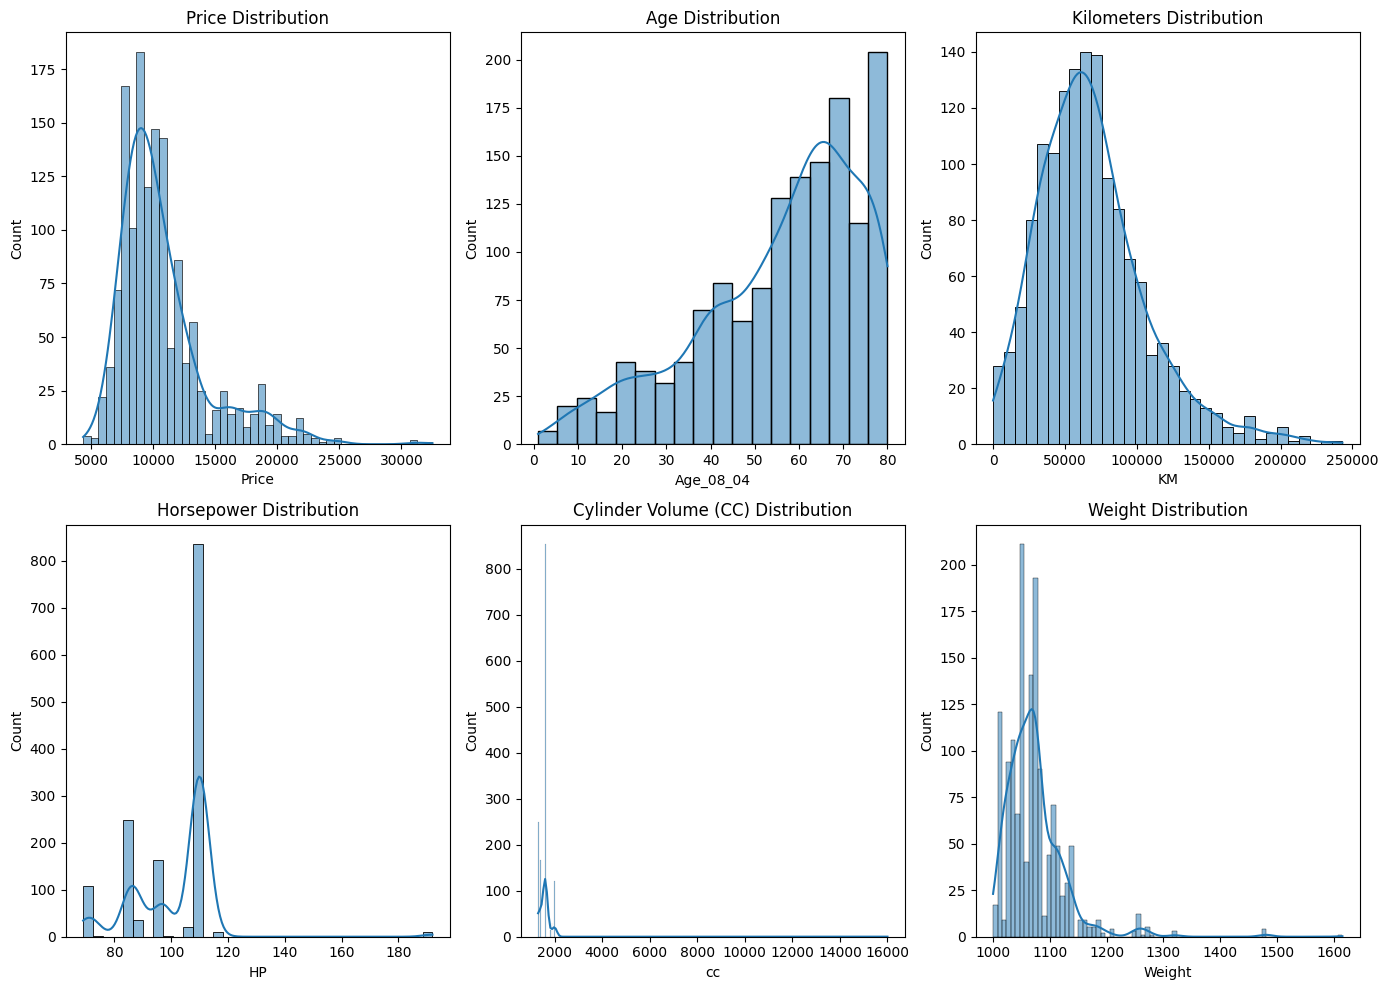

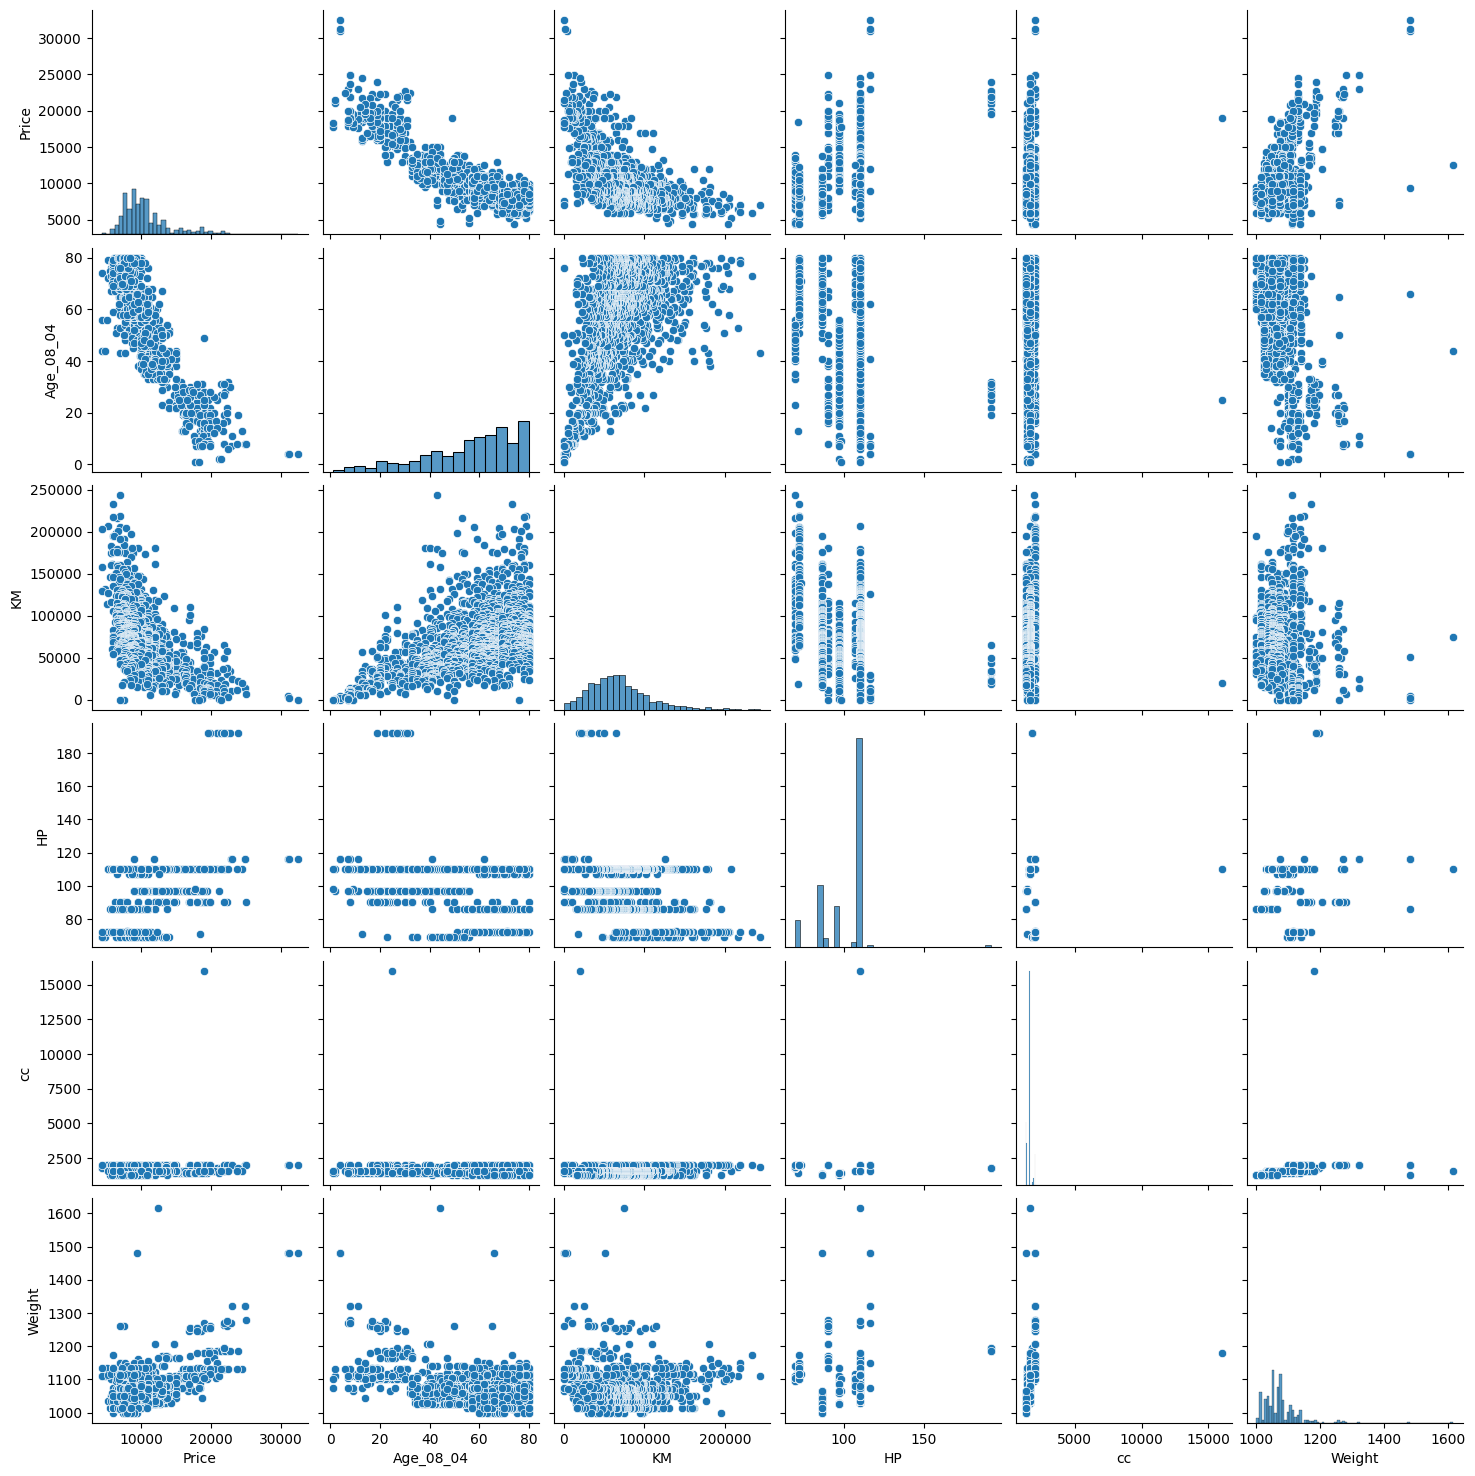

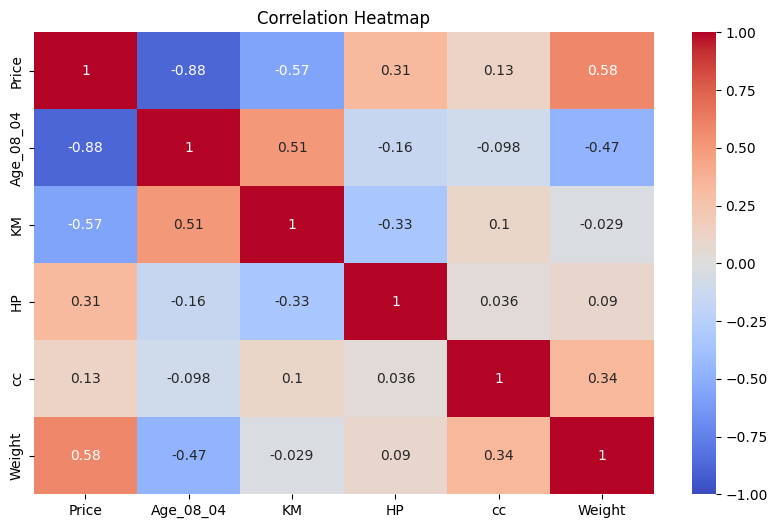

(   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
 0  13500         23  46986  90          0  2000      3          4      5   
 1  13750         23  72937  90          0  2000      3          4      5   
 2  13950         24  41711  90          0  2000      3          4      5   
 3  14950         26  48000  90          0  2000      3          4      5   
 4  13750         30  38500  90          0  2000      3          4      5   
 
    Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
 0    1165                 1                 0  
 1    1165                 1                 0  
 2    1165                 1                 0  
 3    1165                 1                 0  
 4    1170                 1                 0  ,
 Price        0
 Age_08_04    0
 KM           0
 Fuel_Type    0
 HP           0
 Automatic    0
 cc           0
 Doors        0
 Cylinders    0
 Gears        0
 Weight       0
 dtype: int64)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = data.describe()

# Visualizing distributions of numerical columns
plt.figure(figsize=(14, 10))

# Distribution of Price
plt.subplot(2, 3, 1)
sns.histplot(data['Price'], kde=True)
plt.title('Price Distribution')

# Distribution of Age
plt.subplot(2, 3, 2)
sns.histplot(data['Age_08_04'], kde=True)
plt.title('Age Distribution')

# Distribution of KM
plt.subplot(2, 3, 3)
sns.histplot(data['KM'], kde=True)
plt.title('Kilometers Distribution')

# Horsepower distribution
plt.subplot(2, 3, 4)
sns.histplot(data['HP'], kde=True)
plt.title('Horsepower Distribution')

# Cylinder Volume (CC)
plt.subplot(2, 3, 5)
sns.histplot(data['cc'], kde=True)
plt.title('Cylinder Volume (CC) Distribution')

# Weight distribution
plt.subplot(2, 3, 6)
sns.histplot(data['Weight'], kde=True)
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

# Pairplot to relationships
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

# correlations between variables
correlation_matrix = data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# missing values
missing_values = data.isnull().sum()


# Encoding categorical variables (Fuel_Type, Automatic)
data_processed = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)


data_processed.head(), missing_values

In [3]:
from sklearn.model_selection import train_test_split

# features and target variable
X = data_processed.drop(columns=['Price'])  # Features
y = data_processed['Price']  # Target variable (Price)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1148, 11), (288, 11), (1148,), (288,))

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Multiple Linear Regression Model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# coefficients of the model
mlr_coefficients = pd.DataFrame(mlr.coef_, X_train.columns, columns=['Coefficient'])

# predictions on the testing set
y_pred_mlr = mlr.predict(X_test)

# performance of the base model
mlr_rmse = mean_squared_error(y_test, y_pred_mlr, squared=False)
mlr_r2 = r2_score(y_test, y_pred_mlr)

# 2. Lasso Regression Model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# predictions with Lasso
y_pred_lasso = lasso.predict(X_test)

# Evaluating the Lasso model
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# 3. Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# predictions with Ridge
y_pred_ridge = ridge.predict(X_test)

# Evaluating the Ridge model
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Compiling the evaluation metrics for all models
model_performance = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'RMSE': [mlr_rmse, lasso_rmse, ridge_rmse],
    'R^2 Score': [mlr_r2, lasso_r2, ridge_r2]})

mlr_coefficients, model_performance

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(                   Coefficient
 Age_08_04        -1.208305e+02
 KM               -1.623141e-02
 HP                1.403948e+01
 Automatic         1.488309e+02
 cc               -3.037219e-02
 Doors            -6.031097e+01
 Cylinders         1.250555e-12
 Gears             5.516007e+02
 Weight            2.588496e+01
 Fuel_Type_Diesel -6.854876e+01
 Fuel_Type_Petrol  1.370809e+03,
                         Model         RMSE  R^2 Score
 0  Multiple Linear Regression  1484.265415   0.834889
 1            Lasso Regression  1481.683922   0.835463
 2            Ridge Regression  1483.154196   0.835136)